Background setup

---



In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 8.4MB/s 
     |████████████████████████████████| 22.2MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


Import the imporatant libraries

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt


import matplotlib.mlab as mlab
import seaborn as sb

%matplotlib inline

**Mount the drive and read data**

---







In [ ]:
#Mount data from drive
from google.colab import drive
drive.mount('/content/Drive') 

Mounted at /content/Drive


In [ ]:

import os
os.listdir('/content/Drive')

['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash']

Load the data

---



In [ ]:
#read data from drive folder
data = pd.read_csv('Drive/My Drive/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Drop None records and Redunadant column

---



In [ ]:
for col in data.columns:
  indexNames = data[ data[col] == "?" ].index
# Delete these row indexes from dataFrame
  data.drop(indexNames , inplace=True)
(data)
# remove column 
data=data.drop("educational-num",axis=1)

Check for any null entries 

---



In [ ]:
for col in data.columns:
  isnun=data[col].isnull()
  print(data[isnun])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []
Empty DataFrame
Columns: 

Discription of numerical column data

---



In [ ]:
data.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


**Data Analysis**

---



---



Education categories

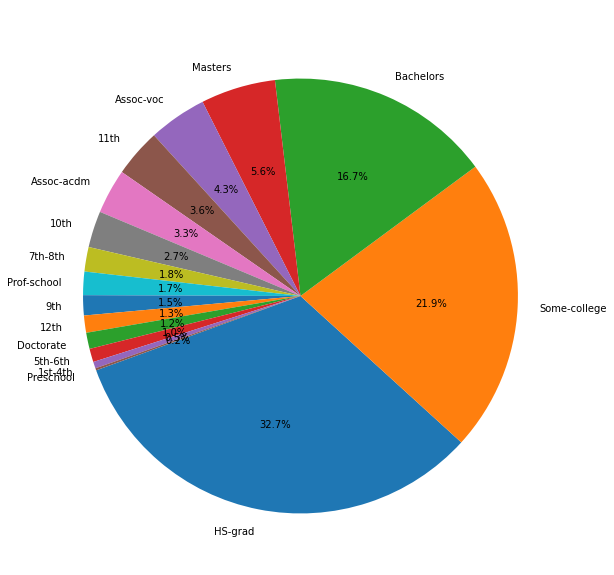

In [ ]:
plt.figure(figsize=(10,10))
temp_series = data['education'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Education", fontsize=15,color="w")
plt.savefig('Pie-chart')
plt.show()

Workclass categories

---



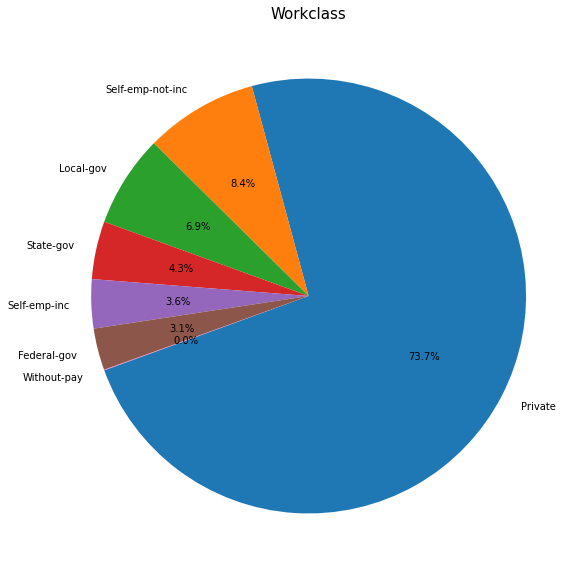

In [ ]:
plt.figure(figsize=(10,10))
temp_series = data['workclass'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Workclass", fontsize=15,color="k")
plt.savefig('Pie-chart')
plt.show()

Marital Status Categories

---



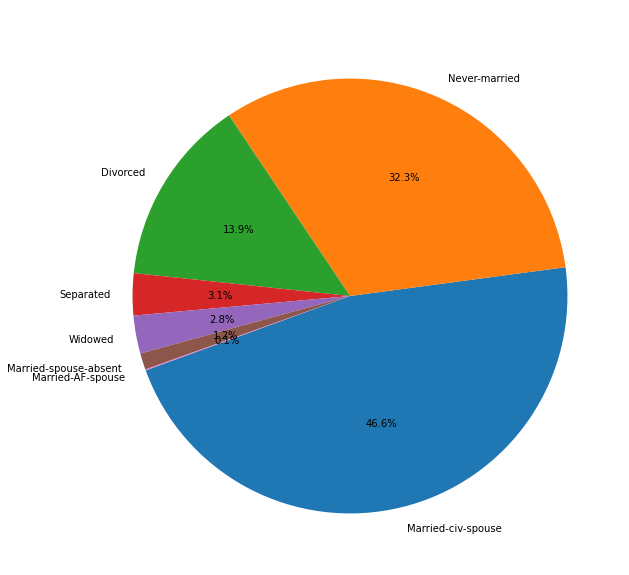

In [ ]:

plt.figure(figsize=(10,10))
temp_series = data['marital-status'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("marital-status", fontsize=15,color="w")
plt.savefig('Pie-chart')
plt.show()

Histogram of every numerical column

---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12f099d198>,
      dtype=object)

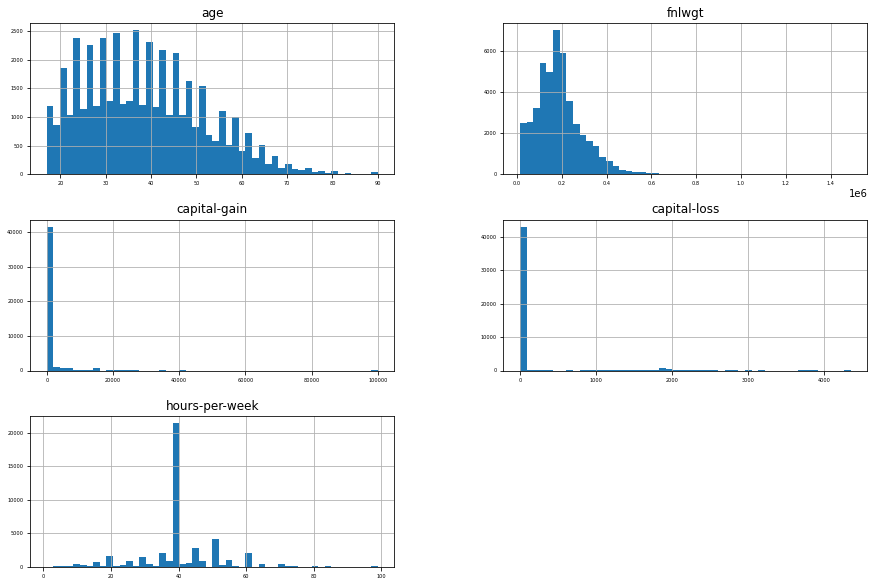

In [ ]:
data.hist(figsize=(15,10), bins=50, xlabelsize=5, ylabelsize=5)

Distribution of Education Income wise

---



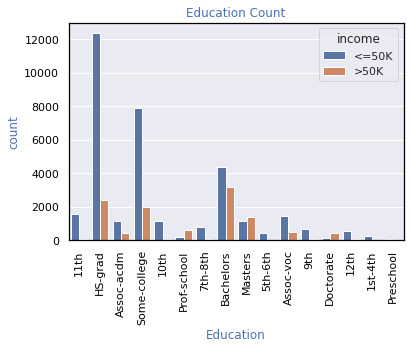

In [ ]:
import seaborn as sns   
sns.set(color_codes=True)

with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
  scatplot = sns.countplot(x="education",hue="income", data=data)

  plt.xlabel('Education',color="b")
  plt.ylabel('count',color="b")
  plt.xticks(rotation=90)
  plt.title('Education Count',color="b")
  plt.show()

Distribution of Income "hours-per-week" wise

---



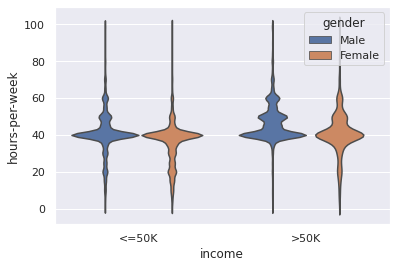

In [ ]:
ax = sns.violinplot(x="income", y="hours-per-week",hue="gender", data=data, inner=None)

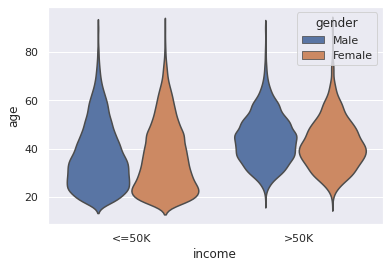

In [ ]:
ax = sns.violinplot(x="income", y="age",hue="gender", data=data, inner=None)

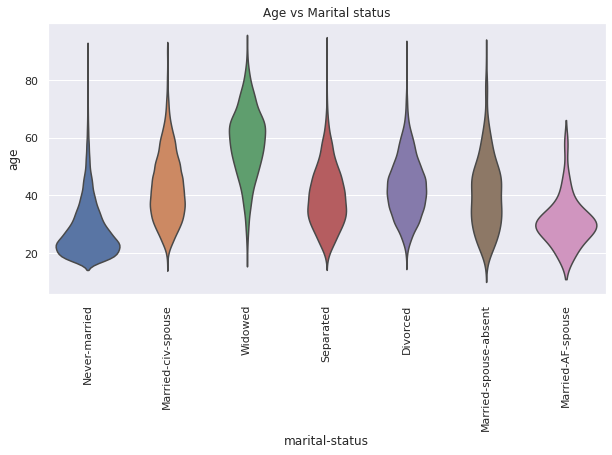

In [ ]:
fig, ax =plt.subplots(1,1,figsize=(10,5))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title("Age vs Marital status")
ax = sns.violinplot(x="marital-status", y="age", data=data, inner=None)

**Normalization**

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age','capital-gain','capital-loss','hours-per-week']

for i in numerical:
  data[i]-=data[i].min()
  data[i] /= data[i].max()


In [ ]:
data.head() 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K


Convert the categorical columns in numeric type

---



In [ ]:
numerical.append("fnlwgt")
features_final = pd.get_dummies(data)
for col in data.columns:
  if col not in numerical:
    temp={}
    for i in range(len(data[col].unique())):
      temp[data[col].unique()[i]]=i
    work = data[col].map(temp)
    data[col]=work

encoded = list(data.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
encoded

14 total features after one-hot encoding


['age',
 'workclass',
 'fnlwgt',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [ ]:
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,0,226802,0,0,0,0,0,0,0.000000,0.0,0.397959,0,0
1,0.287671,0,89814,1,1,1,1,1,0,0.000000,0.0,0.500000,0,0
2,0.150685,1,336951,2,1,2,1,1,0,0.000000,0.0,0.397959,0,1
3,0.369863,0,160323,3,1,0,1,0,0,0.076881,0.0,0.397959,0,1
5,0.232877,0,198693,4,0,3,2,1,0,0.000000,0.0,0.295918,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0,257302,2,1,8,4,1,1,0.000000,0.0,0.377551,0,0
48838,0.315068,0,154374,1,1,0,1,1,0,0.000000,0.0,0.397959,0,1
48839,0.561644,0,151910,1,2,6,3,1,1,0.000000,0.0,0.397959,0,0
48840,0.068493,0,201490,1,0,6,0,1,0,0.000000,0.0,0.193878,0,0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


Find Correlation of all the columns with target column

---



In [ ]:
col_names = data.columns
param = []
correlation = []
abs_corr = []
for c in col_names:
  if c != "income":
    if len(data[c].unique()) <= 2:
      corr = spearmanr(data['income'],data[c])[0]
    else:
      corr = pointbiserialr(data['income'],(data[c]))[0]
    param.append(c)
    correlation.append(corr)
    abs_corr.append(abs(corr))

param_df = pd.DataFrame({'correlation':correlation, 'parameter':param, 'abs_corr':abs_corr})
param_df = param_df.sort_values(by=['abs_corr'], ascending = False)
param_df = param_df.set_index('parameter')
param_df

,correlation,abs_corr
parameter,,
age,0.237040,0.237040
hours-per-week,0.227199,0.227199
capital-gain,0.221034,0.221034
gender,-0.215760,0.215760
education,0.179285,0.179285
capital-loss,0.148687,0.148687
workclass,0.137756,0.137756
relationship,-0.067427,0.067427
occupation,0.042601,0.042601


In [ ]:
income = data['income']
TP = np.sum(income)
FP = income.count()-TP
TN = 0
FN = 0
accuracy = TP/(TP + FP +TN + FN)
recall = TP / (TP+FN)
precision = TP / (TP+FP)
beta = 0.5
fscore = (1+beta**2)*((precision*recall)/ ((beta**2)*precision + recall))
print(accuracy)
print(fscore)

0.2478439697492371
0.29172913543228385


In [ ]:
best_features = param_df.index[0:11].values
print(best_features)

['age' 'hours-per-week' 'capital-gain' 'gender' 'education' 'capital-loss'
 'workclass' 'relationship' 'occupation' 'race' 'marital-status']


In [ ]:
features_final=data

Drop unrelavent columns

---



In [ ]:

for col in data.columns:
  if(col not in best_features):
    features_final=features_final.drop(col,axis=1)

features_final

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,0.109589,0,0,0,0,0,0,0,0.000000,0.0,0.397959
1,0.287671,0,1,1,1,1,1,0,0.000000,0.0,0.500000
2,0.150685,1,2,1,2,1,1,0,0.000000,0.0,0.397959
3,0.369863,0,3,1,0,1,0,0,0.076881,0.0,0.397959
5,0.232877,0,4,0,3,2,1,0,0.000000,0.0,0.295918
...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0,2,1,8,4,1,1,0.000000,0.0,0.377551
48838,0.315068,0,1,1,0,1,1,0,0.000000,0.0,0.397959
48839,0.561644,0,1,2,6,3,1,1,0.000000,0.0,0.397959
48840,0.068493,0,1,0,6,0,1,0,0.000000,0.0,0.193878


In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(features_final, income, test_size=0.30, random_state=1)
X_train, Y_train = SMOTE().fit_sample(x_train, y_train)

SVM

---



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)

y_pred = clf.predict(x_test)

y_train_score = clf.predict(X_train)
#testing accuracy
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
#training accuracy
print(accuracy_score(Y_train, y_train_score, normalize=False, sample_weight=None)*100/len(Y_train))

77.63691309795828
82.77642515321972


Confusion matrix
[[7629 2563]
 [ 471 2904]]


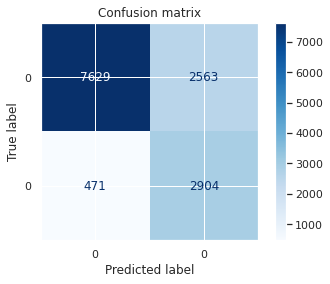

In [ ]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=income,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Logistic Regression

---



In [ ]:

logregmodel = LogisticRegression()
logregmodel.fit(X_train, Y_train)
y_pred = logregmodel.predict(x_test)
y_test_pred = logregmodel.predict(X_train)
#testing accuracy
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
#training accuracy
print(accuracy_score(Y_train, y_test_pred, normalize=False, sample_weight=None)*100/len(Y_train))

72.8311343701629
73.33347326001176


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix
[[7416 2776]
 [ 910 2465]]


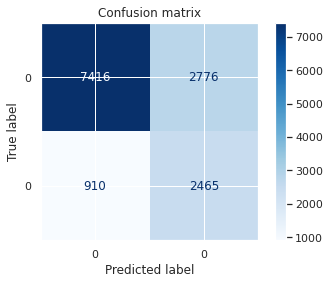

In [ ]:
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logregmodel, x_test, y_test,
                                 display_labels=income,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Naive Bayes

---



In [ ]:

nb=GaussianNB()
nb.fit(X_train, Y_train)
y_pred = nb.predict(x_test)
y_test_pred = nb.predict(X_train)
#testing accuracy
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
#training accuracy
print(accuracy_score(Y_train, y_test_pred, normalize=False, sample_weight=None)*100/len(Y_train))

79.08896587307437
65.92015783729326


Confusion matrix
[[9415  777]
 [2060 1315]]


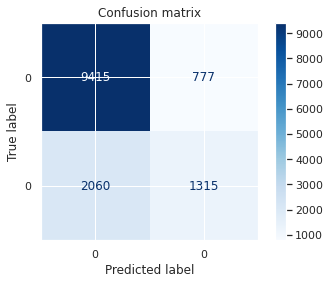

In [ ]:
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb, x_test, y_test,
                                 display_labels=income,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Desicion Tree

---



In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)
dt = dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(x_test)
y_train_score_dt = dt.predict(X_train)
print(accuracy_score(y_test, y_pred_dt, normalize=False, sample_weight=None)*100/len(y_test))
print(accuracy_score(Y_train, y_train_score_dt, normalize=False, sample_weight=None)*100/len(Y_train))

77.87277953858627
83.55721601880614


Confusion matrix
[[7651 2541]
 [ 461 2914]]


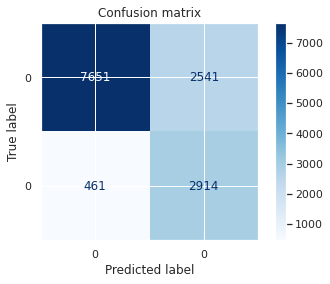

In [ ]:
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt, x_test, y_test,
                                 display_labels=income,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Random Forest

---



In [ ]:
rf=RandomForestClassifier(min_samples_split=20)
rf.fit(X_train, Y_train)
y_pred = rf.predict(x_test)
y_test_pred = rf.predict(X_train)
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
print(accuracy_score(Y_train, y_test_pred, normalize=False, sample_weight=None)*100/len(Y_train))
print(len(X_train))
print(len(x_test))

83.1355494950984
91.81638821257661
47644
13567


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test, y_pred, target_names = ['<50k','>=50k']))

              precision    recall  f1-score   support

        <50k       0.92      0.85      0.88     10192
       >=50k       0.64      0.77      0.70      3375

    accuracy                           0.83     13567
   macro avg       0.78      0.81      0.79     13567
weighted avg       0.85      0.83      0.84     13567



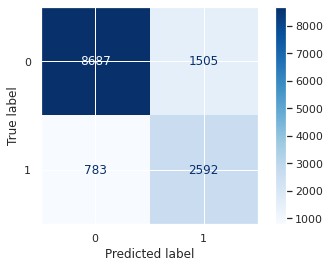

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(rf, x_test, y_test,
                                 cmap=plt.cm.Blues)

plt.show()

In [ ]:
(rf.predict_proba(features_final))[:,1]
data["classification_score"]=(rf.predict_proba(features_final))[:,1]#>=50K

In [ ]:
data["predict_income"]=rf.predict(features_final)
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,classification_score,predict_income
0,0.109589,0,226802,0,0,0,0,0,0,0.000000,0.0,0.397959,0,0,0.000000,0
1,0.287671,0,89814,1,1,1,1,1,0,0.000000,0.0,0.500000,0,0,0.462652,0
2,0.150685,1,336951,2,1,2,1,1,0,0.000000,0.0,0.397959,0,1,0.514296,1
3,0.369863,0,160323,3,1,0,1,0,0,0.076881,0.0,0.397959,0,1,0.964127,1
5,0.232877,0,198693,4,0,3,2,1,0,0.000000,0.0,0.295918,0,0,0.011360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0,257302,2,1,8,4,1,1,0.000000,0.0,0.377551,0,0,0.466354,0
48838,0.315068,0,154374,1,1,0,1,1,0,0.000000,0.0,0.397959,0,1,0.398180,0
48839,0.561644,0,151910,1,2,6,3,1,1,0.000000,0.0,0.397959,0,0,0.032408,0
48840,0.068493,0,201490,1,0,6,0,1,0,0.000000,0.0,0.193878,0,0,0.000000,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


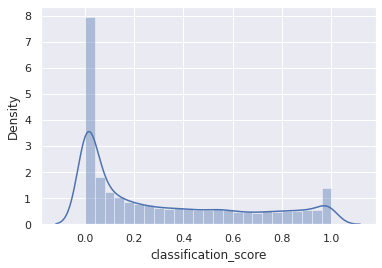

In [ ]:
sns.distplot(data["classification_score"],bins=25)

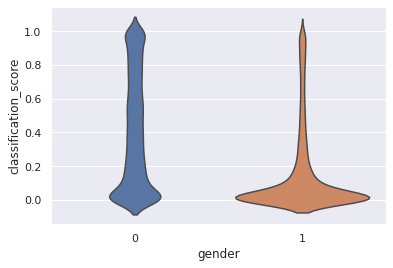

In [ ]:
ax = sns.violinplot(x="gender", y="classification_score", data=data, inner=None)# gender 0=Male 1=Female classification= prob(>=50K)

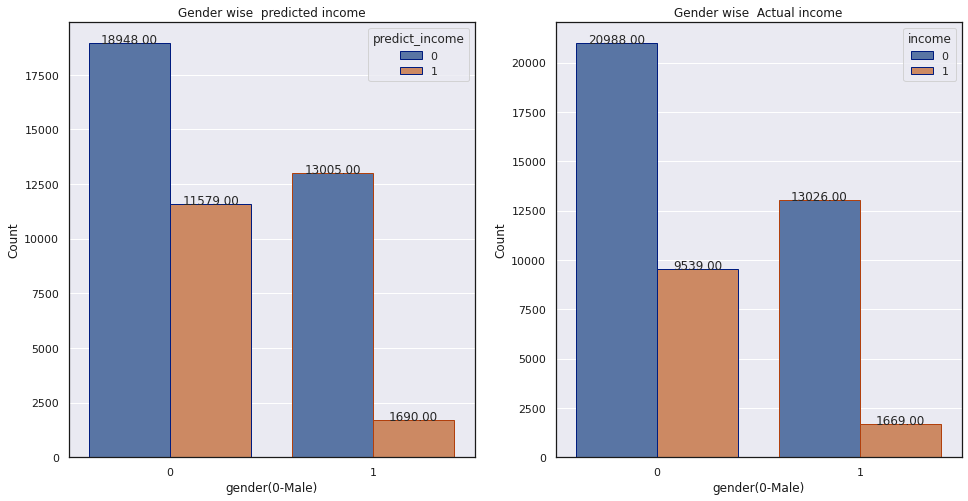

In [ ]:
with plt.rc_context({'axes.edgecolor':'k', 'xtick.color':'k', 'ytick.color':'k'}):
  fig, ax =plt.subplots(1,2,figsize=(16,8))

  scatplot1 = sns.countplot(x="gender",hue="predict_income", data=data, edgecolor=sns.color_palette("dark", 3),ax=ax[0])
  scatplot2 = sns.countplot(x="gender",hue="income", data=data,edgecolor=sns.color_palette("dark", 3), ax=ax[1])
  for p in scatplot1.patches:
    height = p.get_height()
    scatplot1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
  for p in scatplot2.patches:
    height = p.get_height()
    scatplot2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
    
  ax[0].set_title('Gender wise  predicted income',color="k")
  ax[0].set_xlabel('gender(0-Male)',color="k")
  ax[0].set_ylabel('Count',color="k")
  
  ax[1].set_title('Gender wise  Actual income',color="k")
  ax[1].set_xlabel('gender(0-Male)',color="k")
  ax[1].set_ylabel('Count',color="k")

  plt.show()